In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [3]:
from tensorflow.keras import layers

input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(input_shape, name='input_layer')

x=base_model(inputs, training=False)

x=layers.GlobalAveragePooling2D(name='Global_avg_pooling_2D')(x)

x=layers.Dense(101)(x)

output = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 

model_1=tf.keras.Model(inputs,output)

model_1.compile(loss='sparse_categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [4]:
checkpoint_path='food_vision_fine_tune_checkpoint'

In [5]:
model_1.load_weights(checkpoint_path)

In [6]:
class_names=["apple_pie"	  , "eggs_benedict"	  ,   "onion_rings",
"baby_back_ribs" , "escargots"	 ,  "oysters",
"baklava"	 , "falafel"	 ,  "pad_thai",
"beef_carpaccio	"  , "filet_mignon" ,  "paella",
"beef_tartare" , "fish_and_chips" ,  "pancakes",
"beet_salad" , "foie_gras"	 ,  "panna_cotta",
"beignets" , "french_fries" ,  "peking_duck",
"bibimbap" , "french_onion_soup" ,  "pho",
"bread_pudding" , "french_toast" ,  "pizza",
"breakfast_burrito " , "fried_calamari" ,  "pork_chop",
"bruschetta" , "fried_rice"	 ,  "poutine",
"caesar_salad" , "frozen_yogurt" ,  "prime_rib",
"cannoli" , "garlic_bread" ,  "pulled_pork_sandwich",
"caprese_salad" , "gnocchi"	 ,  "ramen",
"carrot_cake" , "greek_salad"	 ,  "ravioli",
"ceviche"	 , "grilled_cheese_sandwich" , "red_velvet_cake",
"cheesecake" , "grilled_salmon" ,  "risotto",
"cheese_plate" , "guacamole"	 ,  "samosa",
"chicken_curry" , "gyoza"	 ,  "sashimi",
"chicken_quesadilla" , "hamburger"	 ,  "scallops",
"chicken_wings" , "hot_and_sour_soup" ,  "seaweed_salad",
"chocolate_cake" , "hot_dog"	 ,  "shrimp_and_grits",
"chocolate_mousse" ,   "huevos_rancheros" ,  "spaghetti_bolognese",
"churros"	 , "hummus"	 ,  "spaghetti_carbonara",
"clam_chowder" , "ice_cream"	 ,  "spring_rolls",
"club_sandwich" , "lasagna"	 ,  "steak",
"crab_cakes" , "lobster_bisque" ,  "strawberry_shortcake",
"creme_brulee" , "lobster_roll_sandwich"  , "sushi",
"croque_madame" , "macaroni_and_cheese"   ,  "tacos",
"cup_cakes" , "macarons"	 ,  "takoyaki",
"deviled_eggs" , "miso_soup"	 ,  "tiramisu",
"donuts"	 , "mussels"	 ,  "tuna_tartare",
"dumplings" , "nachos"	 ,  "waffles",
"edamame"	 , "omelette"]

In [7]:
class_names=sorted(class_names)

In [8]:
from helper_functions import predict_for

1/1 [==============================] - 0s 214ms/step


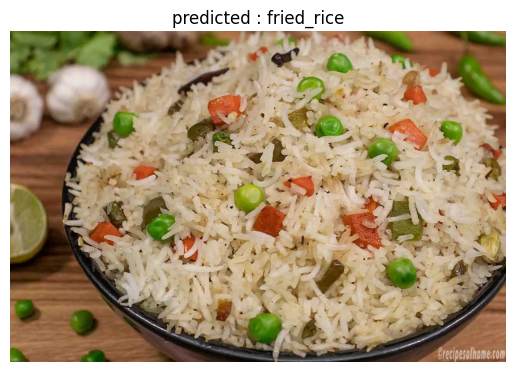

In [23]:
predict_for(model_1,class_names,url=input('enter url '))